In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import joblib

In [14]:
df = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\Projects\\(Docker) House Pricing\\dataset\\house_prices.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  object 
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:

waterfront_encoder = LabelEncoder()
condition_encoder = LabelEncoder()

df['waterfront'] = df['waterfront'].astype(str).str.upper()    
df['condition'] = df['condition'].astype(str).str.title()       


df['waterfront'] = waterfront_encoder.fit_transform(df['waterfront'])
df['condition'] = condition_encoder.fit_transform(df['condition'])

In [6]:
numeric_columns = df.select_dtypes(include='number').columns.drop(["id",'price'])

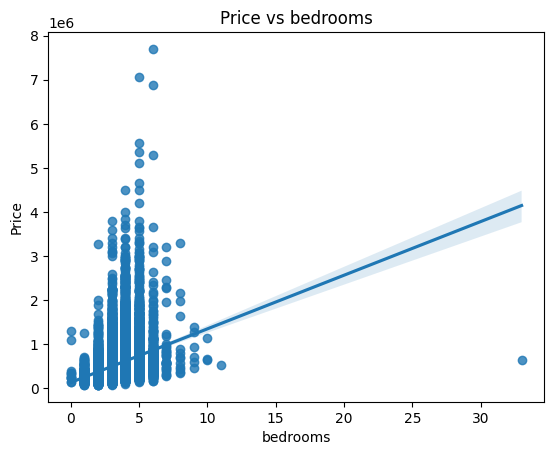

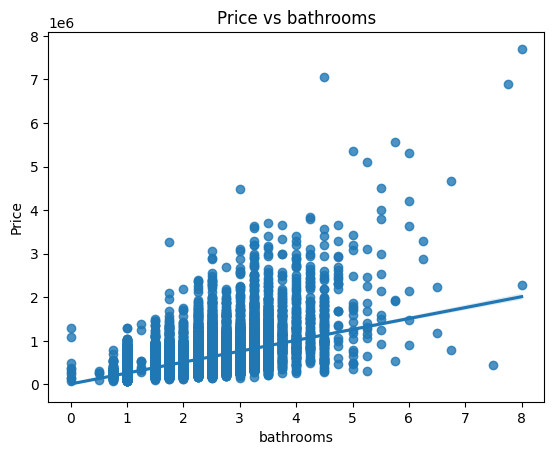

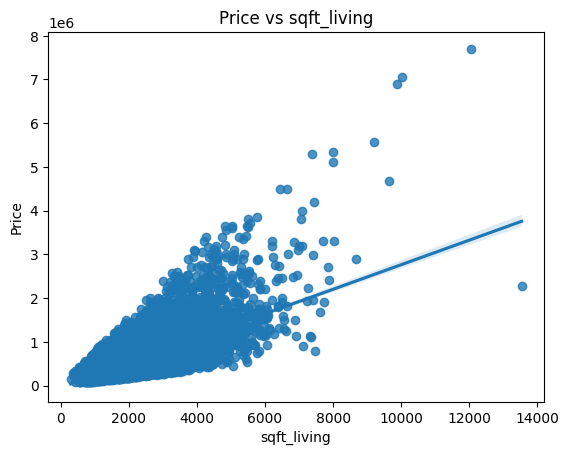

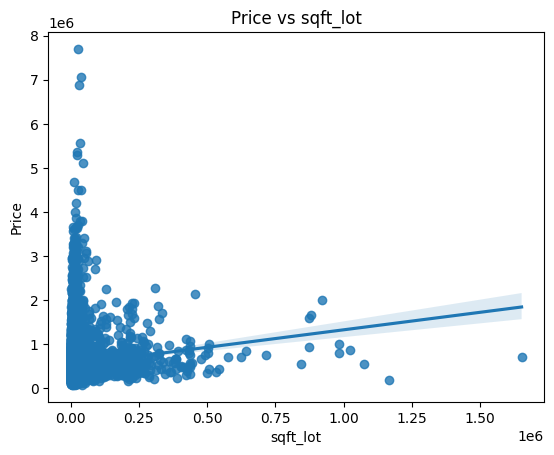

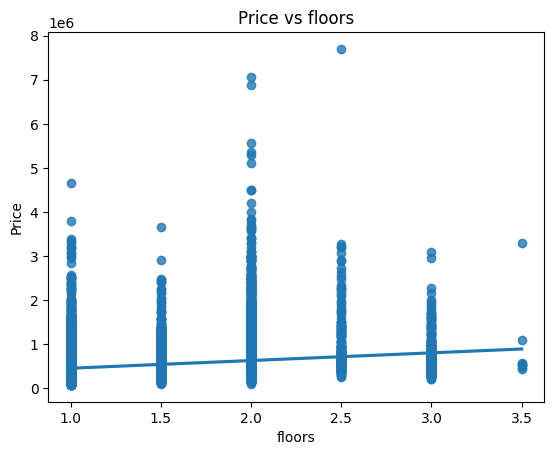

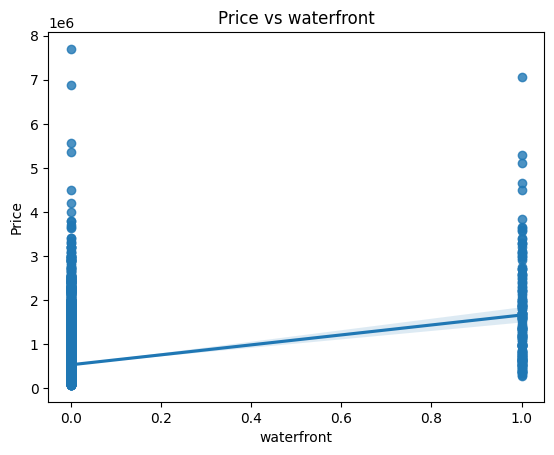

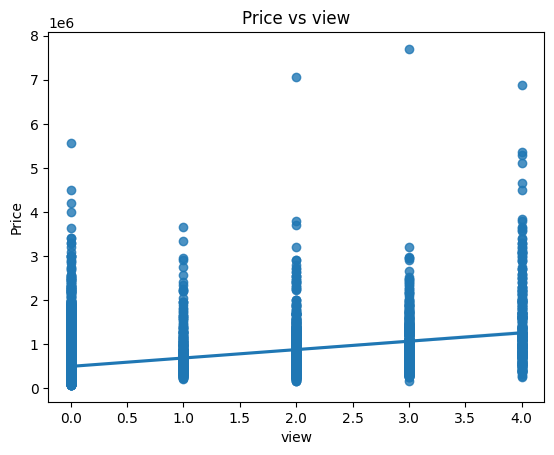

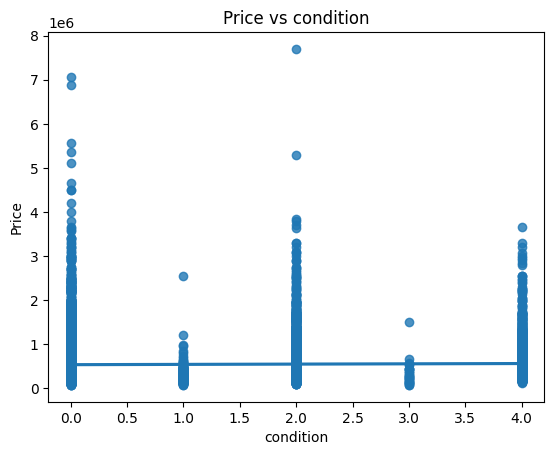

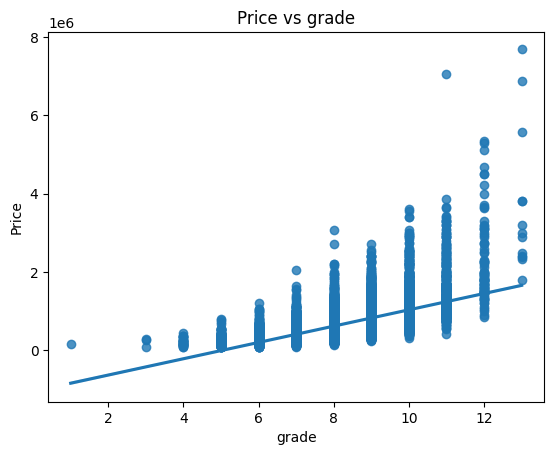

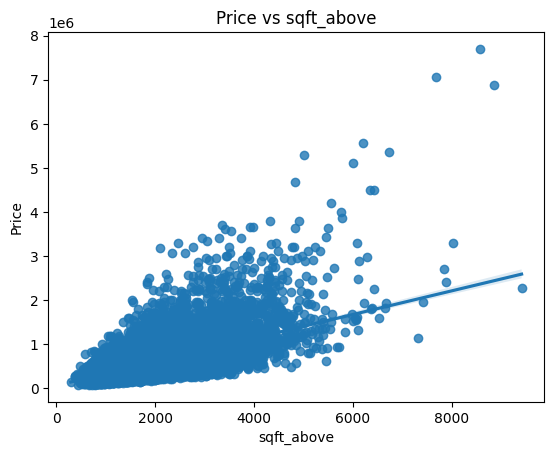

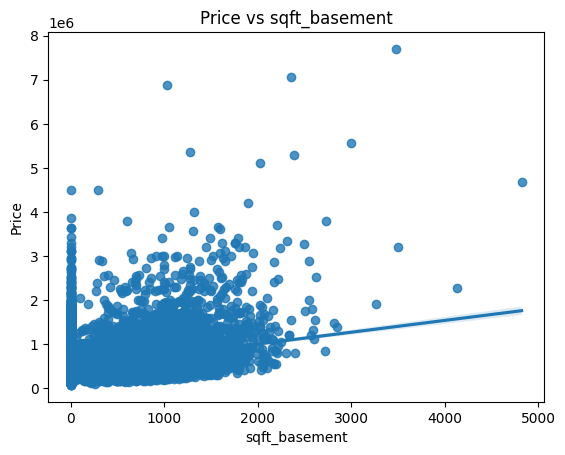

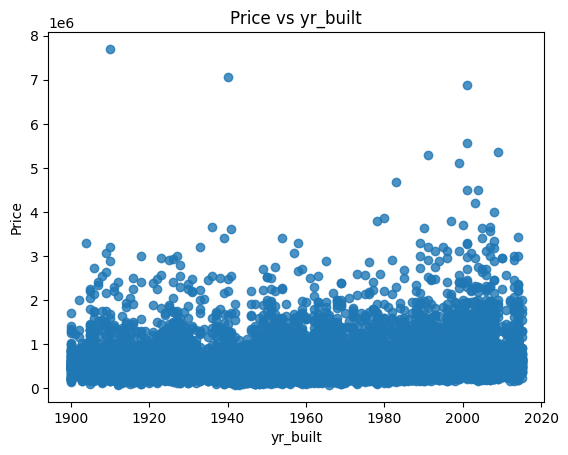

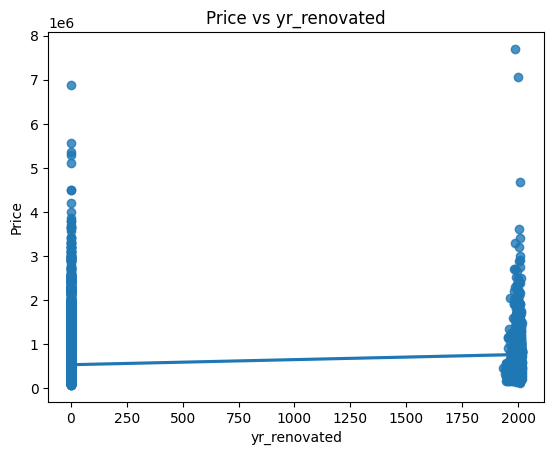

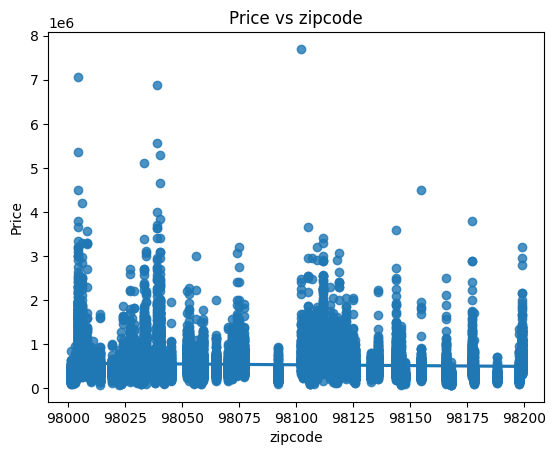

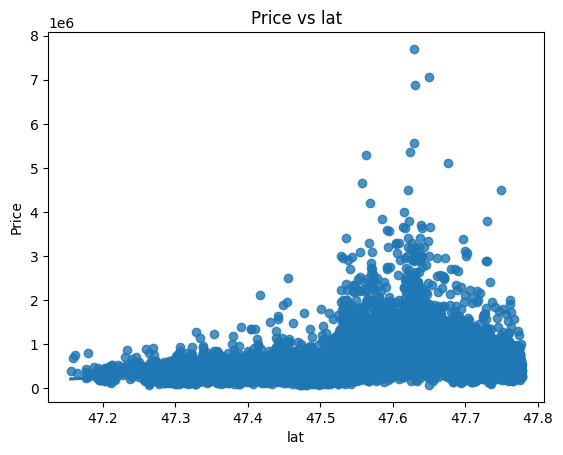

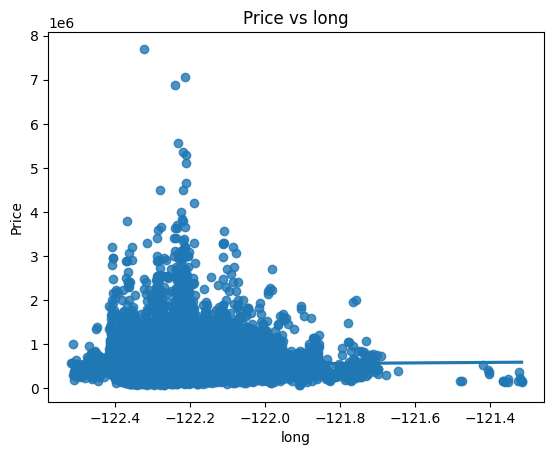

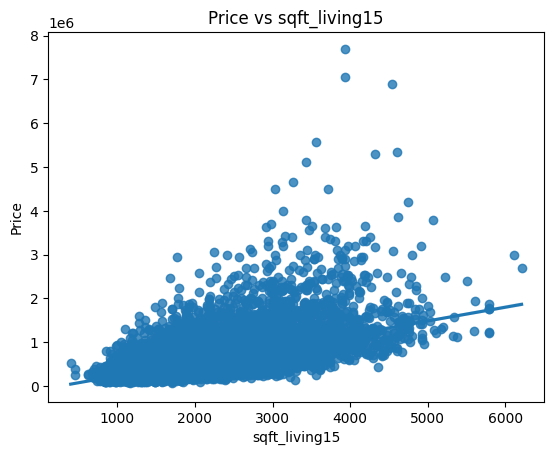

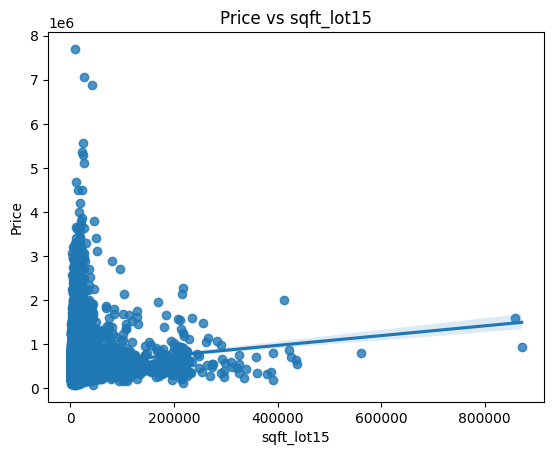

In [7]:

for col in numeric_columns:
    sns.regplot(x=col, y="price", data=df)
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

In [7]:
df=df.drop(["id",'date'],axis=1)

In [9]:
df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.022141,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.010865,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.154084,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.081338,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,0.000013,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.287713,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.019023,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.044012,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.022141,0.010865,-0.154084,-0.081338,0.000013,-0.287713,0.019023,0.044012,1.000000,-0.179244,-0.180947,0.169771,-0.395857,-0.064438,0.010167,-0.019168,-0.115105,-0.108476,0.000387
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.179244,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


# Modelling

In [ ]:
x=df.drop("price",axis=1)
y=df["price"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  

scaler=StandardScaler()
columns = x.columns
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=columns)
linmod = LinearRegression()
xgb = XGBRegressor(random_state=42)

randomf = RandomForestRegressor(random_state=42)
dtmod = DecisionTreeRegressor(random_state=42)


ensemble = VotingRegressor(
    estimators=[
        ("linmod", linmod),
        ("xgb", xgb),
        ("randomf", randomf),
        ("dtmod", dtmod)

    ]
)


ensemble.fit(x_train, y_train)



y_pred = ensemble.predict(x_test)


ensemble_score = ensemble.score(x_test, y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)


print("Ensemble score:", ensemble_score)
print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)
print("MSE:", mse)

Ensemble score: 0.8527435990493386
R2 Score: 0.8527435990493386
MAE: 77710.00445523881
RMSE: 149203.68143748477
MSE: 22261738554.49844


In [ ]:

n = x_test.shape[0]
p = x_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
print("Adjusted R2:", adjusted_r2)

Adjusted R2: 0.8521277497888572


In [18]:

joblib.dump(ensemble, 'model.joblib')

['model.joblib']

In [ ]:
joblib.dump(scaler, 'scaler.joblib')


['encoder.joblib']

In [16]:
joblib.dump(condition_encoder, 'condition_encoder.joblib')
joblib.dump(waterfront_encoder, 'waterfront_encoder.joblib')

['waterfront_encoder.joblib']